# Projeto 2 - Ciência dos Dados
##### Lucas F. K. Sousa (2B) e Francisco Ciol R. Aveiro (2A)

Como objetivo do Projeto 2 de Ciência dos Dados, realizamos uma análise estatística acerca do comportamento de usuários aleatórios em um teste A/B.
Para tornar tal tarefa possível, foi necessária a criação de duas versões de um mesmo site (versões A e B) e a definição da tarefa a ser apresentada ao usuário e do parâmetro a ser utilizado como fator de medição das diferenças comportamentais do mesmo.

Optamos por utilizar a página de Downloads do site do editor de texto "Sublime Text 3". Esta pode ser visitada através do seguinte link: https://www.sublimetext.com/3.
Mantivemos a língua inglesa utilizada no site, inclusive o texto que adicionamos como subtítulo. Na página, encontram-se várias versões (as *Builds*) do software ao qual essa se refere, além das respectivas datas de lançamento (*Release Date*) e algumas poucas informações adicionais não importantes para este projeto.

Modificamos a página, transformando-a de "Sublime Text 3" para "Subliminal Test 3".
Então, definimos esta modificação do site original como a **versão A** e a modificamos criando a **versão B**. Esta tem, como diferenças, a cor de fundo e dos botões existentes na página, a qual passou de *branco* para *laranja* e, além disso,o tamanho da fonte com a qual encontram-se escritas as datas de lançamento de cada *Build*.

Quando o usuário acessa o nosso site, ele espera por alguns segundos até ser redirecionado para uma das versões. Apresentamos ao usuário - no subtítulo - a tarefa de selecionar a versão lançada na data 26 de março de 2015 (no site, está escrito em inglês "Select the Build from 26 March 2015:"). Caso ele selecione a *Build* correto ("Build 3083"), será redirecionado para uma página de agradecimento pela contribuição. Se o mesmo selecionar qualquer outro *Build*, aparecerá na tela uma mensagem reforçando que sua tarefa é selecionar a *Build* lançado dia 26 de março de 2015.

Para analisarmos o comportamento do usuário de acorodo com a página acessada, utilizamos o tempo como parâmetro de análise. No momento em que a página com o conteúdo (versão A ou B) carrega, inicia-se a contagem do tempo, e quando o botão correto é selecionado, a contagem se encerra. Considerando a diferença no tamanho da fonte das datas entre as duas páginas, esperava-se que os usuários que acessassem a versão B completariam a tarefa mais rapidamente que os usuários da versão A.

In [20]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline
import statistics

In [5]:
arquivo = open("uau-f424e-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [6]:
for k,v in dados_fire["logs"].items():
    #print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        #print(chave, valor) # habilite para imprimir as chaves inferiores
        pass #desabilite quando reabilitar a linha de cima

In [7]:
lista_dicionarios = []

for k,v in dados_fire["logs"].items():
    lista_dicionarios.append(v)

In [8]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [9]:
dataframe

,tempo,tipo,user_id,versao
0,1479407152575,final,1350418302,A
1,1479405938691,final,3740328923,A
2,1479407150183,inicio,1350418302,A
3,1479331202037,final,616614234,A
4,1478297498301,inicio,1753850124,A
5,1479331837309,final,1258865379,B
6,1479408465618,inicio,3740328923,A
7,1479329286676,inicio,109152046,A
8,1479407886587,final,4178368966,A
9,1478303060689,inicio,5739265920,B


In [10]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

In [11]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once

In [12]:
users = list(users) 

In [13]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [14]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
2,1479407150183,inicio,1350418302,A
0,1479407152575,final,1350418302,A


In [15]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [16]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [17]:
dataframe_resumo

,delta_t,user_id,versao
0,14.668,5739265920,B
1,26.970,1355150594,B
2,15.115,3825712005,B
3,7.161,1753850124,A
4,37.343,1237485838,B
5,10.427,4162256545,A
6,4.556,204229418,A
7,20.029,109152046,A
8,9.702,2167939248,A
9,15.316,1175594813,A


(array([ 2.,  2.,  1.,  4.,  0.,  1.,  0.,  2.,  0.,  1.]),
 array([  2.518 ,   6.0005,   9.483 ,  12.9655,  16.448 ,  19.9305,
         23.413 ,  26.8955,  30.378 ,  33.8605,  37.343 ]),
 <a list of 10 Patch objects>)

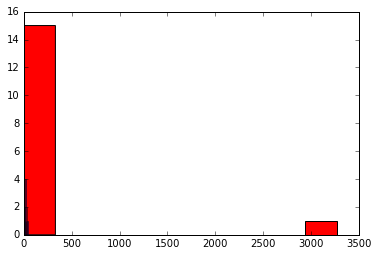

In [18]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
plt.hist(tempos_A, bins=10, color='red')
plt.hist(tempos_B, bins=10, alpha=0.5, color='blue')

#### Calculando Médias:

In [21]:
np.mean(tempos_A)

215.16156250000003

In [22]:
np.mean(tempos_B)

15.872769230769231

Podemos observar que, de fato, os usuários que acessaram a versão A demoraram mais tempo para completar a tarefa apresentada quando comparados aos que acessaram a versão B.

#### Calculando Variâncias:

In [23]:
statistics.pvariance(tempos_A)

621695.68990049616

In [24]:
statistics.pvariance(tempos_B)

97.383145254437892

#### Desenvolvendo o modelo com base em hipóteses:

H0: ud = 0 (Não altera)

H1: ud > 0 (Altera)

ud = uAntes-uDepois

alfa = 5%


O teste utilizado foi o teste t de Student, considerando variâncias diferentes:

In [25]:
stats.ttest_ind(tempos_A,tempos_B,equal_var=False)

Ttest_indResult(statistic=0.97880699673646232, pvalue=0.34319301794780432)

Tendo calculado a densidade t (statistic) e os graus de liberdade v (pvalue), analisamos o comportamento de um modelo com uma amostra relativamente pequena. Tal fato pode ser notado pelo valor pequeno de v=0.343. Deve-se observar que, conforme o tamanho da amostra aumenta, a densidade t aproxima-se da Normal padrão, sendo que, para graus de liberdade superiores a 120, é utilizada a tabela da distribuição Normal ao invés da tabela própria da distrinuição t-Student.